In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Considere o caso em que se deseja gerar pares de dados, 𝑎 e 𝑏, gaussianos com valores verdadeiros 𝑎0 e
𝑏0, desvios-padrões 𝜎𝑎 e 𝜎𝑏 e coeficiente de correlação 𝜌 (ou seja, com covariância, 𝑐𝑜𝑣(𝑎, 𝑏) = 𝜌 𝜎𝑎 𝜎𝑏.
Esses dados podem ser gerados a partir de dois números aleatórios gaussianos descorrelacionados, com
valores verdadeiros nulos e desvios-padrão unitários, 𝑟1 e 𝑟2, da seguinte forma: \
𝑎 = 𝑎0 + 𝜎𝑎 * 𝑟1 \
𝑏 = 𝑏0 + 𝜎𝑏 * (𝜌 * 𝑟1 + sqrt(1 − 𝜌2) * 𝑟2) \
Vamos considerar um caso em que os valores verdadeiros de 𝑎 e 𝑏 sejam, respectivamente, 𝒂𝟎 = 𝟑𝟎 e
𝒃𝟎 = 𝟐𝟎 e que os desvios-padrões verdadeiros sejam iguais: 𝝈𝒂 = 𝝈𝒃 = 𝟐, de modo que as simulações a
seguir só irão diferir pelo coeficiente de correlação, 𝝆. \

a) Gere 𝑵 = 𝟓𝟎𝟎 pares de dados com 𝝆 = +0.75 e os represente em um gráfico de dispersão. Avalie
qualitativamente se é fácil perceber alguma relação entre os valores de 𝑏 de acordo com os valores de 𝑎.

Vamos criar uma função para isso

In [15]:
def func(a0, b0, σa, σb, N, ρ):
    M = np.zeros((N,2))
    for i in range(len(M)):
        r1, r2 = np.random.randn(), np.random.randn()
        M[i] = ([ a0+σa*r1, b0+σb*(ρ*r1+np.sqrt(1-ρ**2)*r2) ])
    return M

Aplicando os valores na função

In [16]:
a0, b0, σa, σb, N, ρ = 30, 20, 2, 2, 500, 0.75
M = func(a0, b0, σa, σb, N, ρ)

Um gráfico da distribuição dos pontos gerados

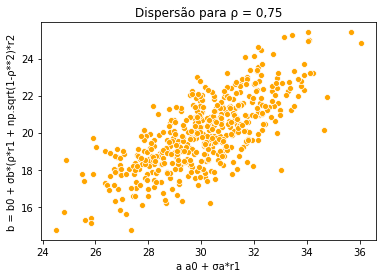

In [17]:
sns.scatterplot(x=M[:,0], y=M[:,1], color='orange')
plt.xlabel('a a0 + σa*r1')
plt.ylabel('b = b0 + σb*(ρ*r1 + np.sqrt(1-ρ**2)*r2')
plt.title('Dispersão para ρ = 0,75')
plt.savefig('TEFE18/figurarho{}.png'.format(ρ), dpi=250)
plt.show()

a.1) Conte o número de vezes, 𝑛, em que os erros de 𝑎 e 𝑏 tem o mesmo sinal (o erro é a diferença entre o valor gerado e o valor verdadeiro). Usando seus conhecimentos sobre binomial, estime a incerteza de 𝑛.


In [18]:
n_vezes = np.sum((M[:,0] >= a0) & (M[:,1] >= b0) | (M[:,0] < a0) & (M[:,1] < b0))
σ_n_v = np.sqrt(n_vezes*(1 - n_vezes/N))
print('A quatidade de vezes que a e b tem o mesmo sinal {} +/- {:.0f}.'.format(n_vezes, σ_n_v))

A quatidade de vezes que a e b tem o mesmo sinal 372 +/- 10.


a.2) Usando o valor de n calculado no item anterior com sua respectiva incerteza, determine a frequência relativa com que os erros de a e b tem o mesmo sinal, f=n/N, e sua respectiva incerteza.

In [19]:
f = n_vezes / N
σ_f = σ_n_v / N
print('A frequência relativa com que os erros de a e b tem o mesmo final {:.2f} +/- {:.2f}.'.format(f, σ_f))

A frequência relativa com que os erros de a e b tem o mesmo final 0.74 +/- 0.02


a.3) Calcule a covariância amostral, 𝑉𝑎𝑏, e a correspondente correlação amostral, 𝑅, dos 𝑁 pares devalores de 𝑎 e 𝑏 gerados. Use as expressões fornecidas na Nota 2 abaixo para estimar as incertezasde $𝑉_{𝑎𝑏}$ e 𝑅. Compare com os valores de 𝑐𝑜𝑣(𝑎, 𝑏) e 𝜌 usados para gerar os dados. \

Nota 1: a covariância amostral é calculada por $𝑉_{𝑎𝑏} =\frac{1}{N-1}∑ (𝑎𝑖 − 𝑎𝑚)(𝑏𝑖 − 𝑏𝑚)$, onde 𝑎𝑚 e 𝑏𝑚 são osvalores médios e a correspondente correlação amostral por 𝑅 =𝑉𝑎𝑏𝑠𝑎 𝑠𝑏, onde 𝑠𝑎 e 𝑠𝑏 são os desvios-padrõesamostrais.Nota 2: A incerteza da covariância amostral pode ser estimada por 𝑖𝑛𝑐𝑉 ≅ 𝑠𝑎𝑠𝑏√(1+𝑅2)𝑁−1e a do coeficiente decorrelação por 𝑖𝑛𝑐𝑅 ≅1−𝑅 2√(𝑁−1)

In [20]:
def somatoria_dupla(M, am, bm):
    val = 0
    for i in range(len(M[:,0])):
        val += (M[i,0] - am) * (M[i,1] - bm)
    return val/(N-1)

In [32]:
am, bm = np.mean(M[:,0]), np.mean(M[:,1])
Vab = somatoria_dupla(M, am, bm)

σa, σb = np.std(M[:,0], ddof=1), np.std(M[:,1], ddof=1)
R = Vab/(σa * σb)

σVab = σa*σb*np.sqrt((1 + R**2) / (N-1))
σR = (1 - R**2)/np.sqrt(N-1)

print('Vab = {:.2f} +/- {:.2f}\n====================\nR = {:.2f} +/- {:.2f}.'.format(Vab, σVab, R, σR))

Vab = 2.63 +/- 0.20
R = 0.73 +/- 0.02


a.4) Para cada um dos N pares de valores de 𝒂 e 𝒃, calcule a soma correspondente, 𝑤 = 𝑎 + 𝑏. \
Determine o desvio-padrão amostral de 𝒘 (a incerteza de cada valor de 𝒘).Nota: A incerteza do desvio-padrão amostral pode ser estimada por 𝑖𝑛𝑐𝑠 ≅𝑠√2(𝑁−1)

In [36]:
W = np.add(M[:,0], M[:,1])
Wm = np.mean(W)
σW = np.std(W, ddof=1)
sσ = σW/np.sqrt(2*(N-1))
print( 'σW = {:.2f} +/- {:.2f}.'.format(σW, sσ))

σW = 3.52 +/- 0.11.


a.5) Repita o item anterior para o caso da diferença entre 𝒂 e 𝒃, 𝑧 = 𝑎 − 𝑏.

In [37]:
Z = np.add(M[:,0], np.multiply(-1, M[:,1]))
Zm = np.mean(Z)
σZ = np.std(Z, ddof=1)
sσ = σZ/np.sqrt(2*(N-1))
print( 'σZ = {:.2f} +/- {:.2f}.'.format(σZ, sσ))

σZ = 1.38 +/- 0.04.


a.6) Compare os resultados dos itens a.4 e a.5 com a incerteza esperada para a soma e a diferença se
os dados não fossem correlacionados (isto é, a incerteza calculada por propagação de incertezas com
𝑐𝑜𝑣(𝑎, 𝑏) = 0). Escreva as incertezas calculadas por propagação com 2 algarismos significativos e
comente sobre os efeitos da correlação de 𝑎 e 𝑏 sobre as incertezas de 𝑤 e 𝑧.

$2\sqrt2$

b) Repita o item (a) e seus subitens para o caso em que 𝜌 = −0,75.


In [58]:
a0, b0, σa, σb, N, ρ = 30, 20, 2, 2, 500, -0.75
M = func(a0, b0, σa, σb, N, ρ)

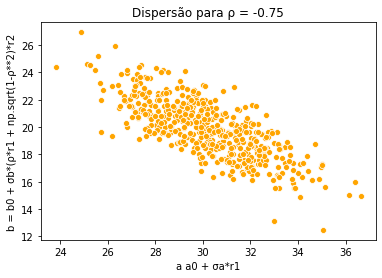

In [59]:
sns.scatterplot(x=M[:,0], y=M[:,1], color='orange')
plt.xlabel('a a0 + σa*r1')
plt.ylabel('b = b0 + σb*(ρ*r1 + np.sqrt(1-ρ**2)*r2')
plt.title('Dispersão para ρ = -0.75')
plt.savefig('TEFE18/figurarho{}.png'.format(ρ), dpi=250)
plt.show()

b.1)

In [60]:
n_vezes = np.sum((M[:,0] >= a0) & (M[:,1] >= b0) | (M[:,0] < a0) & (M[:,1] < b0))
σ_n_v = np.sqrt(n_vezes*(1 - n_vezes/N))
print('A quatidade de vezes que a e b tem o mesmo sinal {} +/- {:.0f}.'.format(n_vezes, σ_n_v))

A quatidade de vezes que a e b tem o mesmo sinal 106 +/- 9.


b.2)

In [61]:
f = n_vezes / N
σ_f = σ_n_v / N
print('A frequência relativa com que os erros de a e b tem o mesmo final {:.2f} +/- {:.2f}.'.format(f, σ_f))

A frequência relativa com que os erros de a e b tem o mesmo final 0.21 +/- 0.02.


b.3)

In [62]:
am, bm = np.mean(M[:,0]), np.mean(M[:,1])
Vab = somatoria_dupla(M, am, bm)

σa, σb = np.std(M[:,0], ddof=1), np.std(M[:,1], ddof=1)
R = Vab/(σa * σb)

σVab = σa*σb*np.sqrt((1 + R**2) / (N-1))
σR = (1 - R**2)/np.sqrt(N-1)

print('Vab = {:.2f} +/- {:.2f}\n====================\nR = {:.2f} +/- {:.2f}.'.format(Vab, σVab, R, σR))

Vab = -3.37 +/- 0.25
R = -0.76 +/- 0.02.


b.4)

In [63]:
W = np.add(M[:,0], M[:,1])
Wm = np.mean(W)
σW = np.std(W, ddof=1)
sσ = σW/np.sqrt(2*(N-1))
print( 'σW = {:.2f} +/- {:.2f}.'.format(σW, sσ))

σW = 1.47 +/- 0.05.


b.5)

In [64]:
Z = np.add(M[:,0], np.multiply(-1, M[:,1]))
Zm = np.mean(Z)
σZ = np.std(Z, ddof=1)
sσ = σZ/np.sqrt(2*(N-1))
print( 'σZ = {:.2f} +/- {:.2f}.'.format(σZ, sσ))

σZ = 3.95 +/- 0.13.


c) Faça apenas a geração dos dados com o gráfico de dispersão correspondente (isto é, o item (a) sem os
subitens) para os casos 𝜌 = 0, 𝜌 = −0,25, 𝜌 = +0,5, 𝜌 = −0,9 e 𝜌 = +0,95.

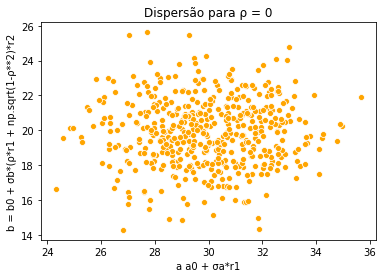

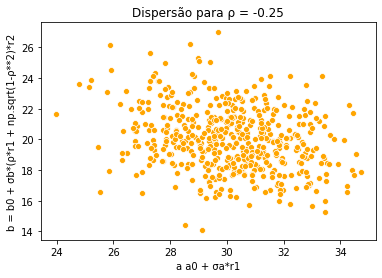

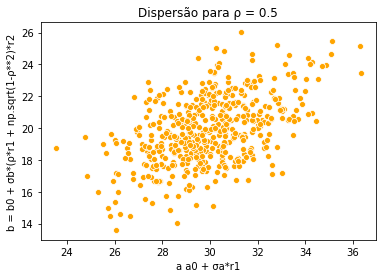

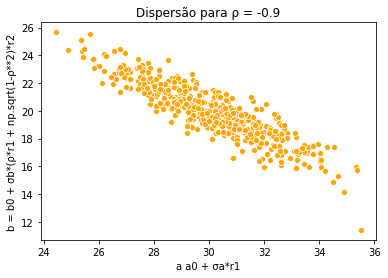

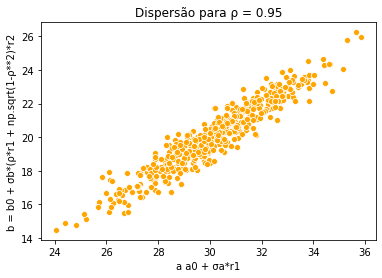

In [13]:
ρ = 0
M = func(a0, b0, σa, σb, N, ρ)
sns.scatterplot(x=M[:,0], y=M[:,1], color='orange')
plt.xlabel('a a0 + σa*r1')
plt.ylabel('b = b0 + σb*(ρ*r1 + np.sqrt(1-ρ**2)*r2')
plt.title('Dispersão para ρ = {}'.format(ρ))
plt.savefig('TEFE18/figurarho{}.png'.format(ρ), dpi=250)
plt.show()

ρ = -0.25
M = func(a0, b0, σa, σb, N, ρ)
sns.scatterplot(x=M[:,0], y=M[:,1], color='orange')
plt.xlabel('a a0 + σa*r1')
plt.ylabel('b = b0 + σb*(ρ*r1 + np.sqrt(1-ρ**2)*r2')
plt.title('Dispersão para ρ = {}'.format(ρ))
plt.savefig('TEFE18/figurarho{}.png'.format(ρ), dpi=250)
plt.show()

ρ = 0.5
M = func(a0, b0, σa, σb, N, ρ)
sns.scatterplot(x=M[:,0], y=M[:,1], color='orange')
plt.xlabel('a a0 + σa*r1')
plt.ylabel('b = b0 + σb*(ρ*r1 + np.sqrt(1-ρ**2)*r2')
plt.title('Dispersão para ρ = {}'.format(ρ))
plt.savefig('TEFE18/figurarho{}.png'.format(ρ), dpi=250)
plt.show()

ρ = -0.9
M = func(a0, b0, σa, σb, N, ρ)
sns.scatterplot(x=M[:,0], y=M[:,1], color='orange')
plt.xlabel('a a0 + σa*r1')
plt.ylabel('b = b0 + σb*(ρ*r1 + np.sqrt(1-ρ**2)*r2')
plt.title('Dispersão para ρ = {}'.format(ρ))
plt.savefig('TEFE18/figurarho{}.png'.format(ρ), dpi=250)
plt.show()

ρ = 0.95
M = func(a0, b0, σa, σb, N, ρ)
sns.scatterplot(x=M[:,0], y=M[:,1], color='orange')
plt.xlabel('a a0 + σa*r1')
plt.ylabel('b = b0 + σb*(ρ*r1 + np.sqrt(1-ρ**2)*r2')
plt.title('Dispersão para ρ = {}'.format(ρ))
plt.savefig('TEFE18/figurarho{}.png'.format(ρ), dpi=250)
plt.show()